In [1]:
#Clone the GitHub repository
!git clone https://github.com/gdacanal/zea5887fzea.git

Cloning into 'zea5887fzea'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 145.27 KiB | 3.46 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
import os

os.chdir('/content/zea5887fzea')

In [3]:
#List files in the current directory
%%shell
ls

AulaCineticaFitting.ipynb	    EAula06ex2PlanilhaDuplicata.xlsx
Eaula06ex2PlanilhaCineticaFit.xlsx  README.md


In [4]:
#Optional (mount Google Drive)
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:

# Import necessary libraries
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load the data from an Excel file
file_path = 'EAula06ex2PlanilhaDuplicata.xlsx'  # Replace with your file path
sheet_name = 'Dados'  # Replace with your sheet name

# Read the sheet to inspect column names
df = pd.read_excel(file_path, sheet_name=sheet_name)
print(df.columns)

Index(['Tempo_A', 'Umidade_A', 'Tempo_B', 'Umidade_B'], dtype='object')


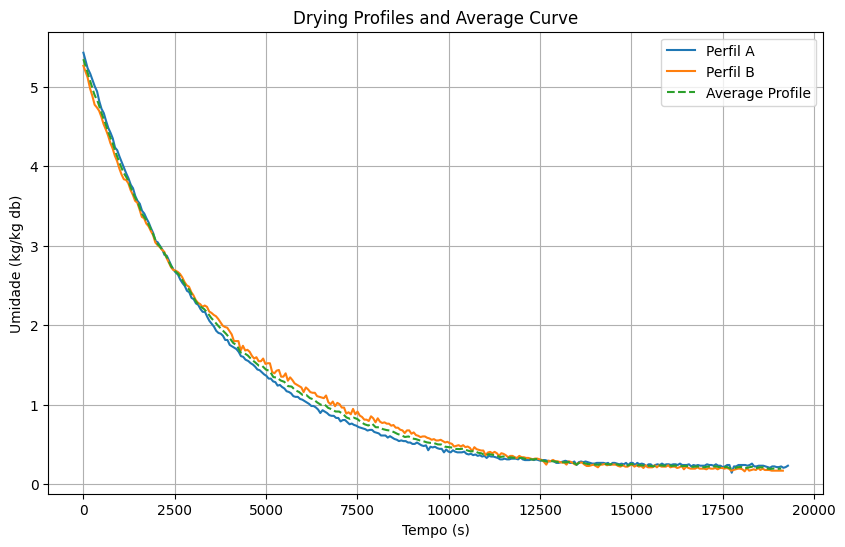

Average curve saved to average_drying_profile.xlsx


In [8]:
# Install necessary libraries
#!pip install pandas openpyxl

# Extract the columns
tempo_A = df['Tempo_A']
umidade_A = df['Umidade_A']
tempo_B = df['Tempo_B']
umidade_B = df['Umidade_B']

# Create an interpolation function for each profile
interp_A = interp1d(tempo_A, umidade_A, kind='linear', fill_value="extrapolate")
interp_B = interp1d(tempo_B, umidade_B, kind='linear', fill_value="extrapolate")

# Generate points for the average curve at intervals of 0, 100, 200, ..., up to 20000
tempo_common = np.arange(0, 20001, 100)

# Calculate the average moisture content
umidade_avg = (interp_A(tempo_common) + interp_B(tempo_common)) / 2

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tempo_A, umidade_A, label='Perfil A')
plt.plot(tempo_B, umidade_B, label='Perfil B')
plt.plot(tempo_common, umidade_avg, label='Average Profile', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Umidade (kg/kg db)')
plt.legend()
plt.title('Drying Profiles and Average Curve')
plt.grid(True)
plt.show()

# Save the average curve to a new Excel file
avg_df = pd.DataFrame({'Tempo': tempo_common, 'Umidade_Avg': umidade_avg})
avg_df.to_excel('average_drying_profile.xlsx', index=False)

print('Average curve saved to average_drying_profile.xlsx')
